In [1]:
import pandas as pd
import json
import numpy as np
import spacy

nlp = spacy.load('en_core_web_md')


def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [2]:
# Load data for town called Las Vegas
# data_path = './data/cleveland heights/' #17 MB
data_path = './data/cleveland/' # 170 MB
# data_path = './data/toronto/' # 650 MB
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [3]:
display(reviews.head())
display(businesses.head())
display(users.head())
display(tips.head())
display(checkins.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qrffudO73zsslZbe8B9D3Q,sG_h0dIzTKWa3Q6fmb4u-g,b2jN2mm9Wf3RcrZCgfo1cg,2.0,1,0,0,I was really looking forward to visiting after...,2015-01-18 14:04:18
1,36xxeOr4m4UlRf9FM1HzdA,liUNZm0tOJJ-d-pFCdqu9A,ZNB91myFoOYgyXoG5LQeGQ,1.0,1,0,0,I took my wife out for a Birthday dinner with ...,2014-12-17 19:34:47
2,4PKiLkFTff9HK44QkOo6vA,vDlrf84X8yu-CZ-8isrOSw,anzCdD5eIEHwydTpXhLlUA,4.0,0,0,1,Heard about this place and was dying to check ...,2015-01-03 20:45:05
3,ydehlths0Zpg2gbXPOs6Qw,wUAQq8gZ9tpWpMDPNTB6TA,CtYWpX_cy1YdZgoKtS0Tqg,1.0,1,0,0,Also don't believe when they say they will giv...,2015-03-04 19:46:32
4,a_g4eysuYC1pI9tv3MCZxA,QaN-nccbLZPWzownQYgTVQ,LzWROAt-RhgaBss4cOoDRQ,4.0,11,3,4,I love the West Side Market but I can't stand ...,2013-08-03 15:06:21


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,Cleveland,OH,44106,41.513554,-81.613752,3.5,11,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Medical Centers",None
1,OwXMxqxIy4YoprAjnoUoiA,B & M Bar-B-Que Shaw,12700 Shaw Ave,Cleveland,OH,44108,41.540890,-81.595327,3.5,4,1,"{'GoodForKids': 'False', 'RestaurantsReservati...","Barbeque, Restaurants",None
2,3e0IGa_-zqTemKLc1dbdmg,Phusion Cafe,11611 Euclid Ave,Cleveland,OH,44106,41.510985,-81.603050,3.5,17,1,"{'OutdoorSeating': 'False', 'WiFi': ''no'', 'G...","Restaurants, Taiwanese","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,_RTnzQumsGrs3n4XuJaDQg,Scorchers,1701 E 12th St,Cleveland,OH,44114,41.502996,-81.685414,3.0,6,0,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Nightlife, Bars, Sports Bars",None
4,x5mv33siyWGXVpOmLACfPQ,Brook Park Laser Wash,5673 Smith Rd,Cleveland,OH,44142,41.409087,-81.803309,1.5,5,1,None,"Automotive, Car Wash",None


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,AWCY8laHjH0-3HMT0LGpUA,Jin,732,2010-07-09 15:53:01,1104,417,586,"2011,2012,2013,2014,2015,2016","Xqo1ru1F7srvbUJaCNHkvQ, v5LvxWrscDM7XKpD6f0WxQ...",71,...,8,11,18,8,83,196,185,185,56,42
2,t-nB38eHbeFuabXBdJMwvg,Katharine,412,2008-06-13 14:48:51,1816,463,1341,"2011,2012,2013,2014,2015,2016,2017,2018","2Y1pwMu2pZJDGQ7moD-2gQ, Qlys2g0R3PfNAuMOhagwLA...",77,...,3,4,1,1,60,64,140,140,120,65
3,d7D4dYzF6THtOx9imf-wPw,Regina,1053,2008-12-05 07:16:22,11769,6997,9594,"2013,2014,2015,2016,2017,2018","SxSeTYznS0YKSISgs5hj_Q, VtnCudEFLBjnxblLUAPYhA...",231,...,46,29,9,5,419,611,822,822,475,338
4,LQbuEFUxqB0Ekt7Ps9ZnJA,Shelby,98,2012-02-26 18:43:59,115,22,21,,"AS2i47y2v1AXz22nrfeJow, Mw0GPZTiVfE9eS0Db-xDaQ...",1,...,0,0,0,0,0,1,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,aoO6EXKupIDDDMMK4PG-iw,e7207sqC-pSn6GIf31ikhQ,Birthday breakfast!,2013-02-21 13:29:23,0
1,BceBAi4nnMWiUsKALGMg3A,mdUnUYQoXTouoziuLzaR0g,Ask for Sharon if you're getting a pedicure!,2012-03-21 12:43:01,0
2,dt9IHwfuZs9D9LOH7gjNew,UoRSHohdGuzfrpydZ9j0Lg,99 cent tacos on Tuesday. $2 enchilada Wednesd...,2014-03-28 18:19:15,0
3,sQnWKfulPIUxN26yvcA2_w,bupMXFUaZfranBLdaVcRww,Shrimp tempura is awesome more like sushi,2012-08-01 23:36:09,0
4,NfU0zDaTMEQ4-X9dbQWd9A,mLjDh0vQYBCY6g9T1HczVw,A little taste of home before flying out acros...,2014-03-13 15:26:28,0


,business_id,date
0,-1vulUmD1pYf0uvXBY1Fzg,"2015-08-01 01:12:20, 2015-08-29 00:02:11, 2015..."
1,-5sQihzwgmq7tuAyUh7RSw,"2011-01-02 19:58:59, 2011-01-10 19:03:04, 2011..."
2,-D8DPlf_b5EBTFhsTjFdZw,"2013-04-19 18:30:27, 2016-06-16 15:05:27, 2016..."
3,-DU8jf5nA1_yaOqsKsLqmw,"2012-05-19 00:26:19, 2013-04-25 21:31:35, 2013..."
4,-DYPu72JHFKno3lAaUWyFw,"2010-06-13 22:29:41, 2010-07-04 23:25:18, 2010..."


In [4]:
print(len([i for i in list(businesses['categories']) if i==None]), 'businesses out of the', len(businesses), 'do not containt categories' )

9 businesses out of the 3606 do not containt categories


In [5]:
def extract_categories(businesses):

    businesses = businesses.dropna(subset = ['categories'])
    
    businesses_m = businesses.apply(lambda row: pd.Series([row['business_id']] + row['categories'].lower().split(",")), axis=1)
    
    stack_genres = businesses_m.set_index(0).stack()
    df_stack_genres = stack_genres.to_frame()
    df_stack_genres['business_id'] = stack_genres.index.droplevel(1)
    df_stack_genres.columns = ['categorie', 'business_id']
    return df_stack_genres.reset_index()[['business_id', 'categorie']]

def pivot_categories(df):
    
    return df.pivot_table(index = 'business_id', columns = 'categorie', aggfunc = 'size', fill_value=0)

In [6]:
categories = extract_categories(businesses)
display(categories.head())

,business_id,categorie
0,YNvZdMLXa4q8e9tiE4ge4A,health & medical
1,YNvZdMLXa4q8e9tiE4ge4A,medical centers
2,OwXMxqxIy4YoprAjnoUoiA,barbeque
3,OwXMxqxIy4YoprAjnoUoiA,restaurants
4,3e0IGa_-zqTemKLc1dbdmg,restaurants


In [7]:
df_utility_categories = pivot_categories(categories)
display(df_utility_categories.head())

categorie,& probates,accessories,accountants,active life,acupuncture,adult,adult education,adult entertainment,advertising,aerial fitness,...,wedding planning,whiskey bars,wholesale stores,window washing,windows installation,windshield installation & repair,wine bars,wine tasting room,women's clothing,yoga
business_id,,,,,,,,,,,,,,,,,,,,,
-1vulUmD1pYf0uvXBY1Fzg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-5sQihzwgmq7tuAyUh7RSw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-7weOHmN5s487aq-7zMbtw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-D8DPlf_b5EBTFhsTjFdZw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-DU8jf5nA1_yaOqsKsLqmw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def create_similarity_matrix_jaccard(matrix):
    m11 = matrix @ matrix.T
    m10 = pd.DataFrame(matrix.sum(axis = 1).values + np.zeros(m11.shape), index = m11.index, columns = m11.index)
    m01 = m10.T
    return m11/(m01 + m10 - m11)

In [9]:
df_jaccard_similarity_categories = create_similarity_matrix_jaccard(df_utility_categories)
display(df_jaccard_similarity_categories.head())

business_id,-1vulUmD1pYf0uvXBY1Fzg,-5sQihzwgmq7tuAyUh7RSw,-7weOHmN5s487aq-7zMbtw,-D8DPlf_b5EBTFhsTjFdZw,-DU8jf5nA1_yaOqsKsLqmw,-DYPu72JHFKno3lAaUWyFw,-DkhPijabXuTNvNteIpRPw,-Eu04UHRqmGGyvYRDY8-tg,-F0B5F1YLx7093otwgboxw,-FyieCVSxbl-asl-FVmEew,...,zmyd5noZ9Fcy6d6Yf_PcHQ,zo9fKM_Sty6qGztXKoMPmQ,zpTyaPc6EJ_CoJdBfm_nLg,zqRTnP_JQv94nuoyO7xCQg,zt9yBumFjjnKhaFpnOdOyA,ztG_sG9ugajX9crrzh0UyA,zukEQmqI4iFszKNmZLWqUg,zwXi28HGMAI5MyCOBdYtcg,zwgbd9PBsQGmRLA9pyoJeA,zwuOvY99p2UAOzuj1wAX6A
business_id,,,,,,,,,,,,,,,,,,,,,
-1vulUmD1pYf0uvXBY1Fzg,1.000,0.0,0.125,0.0,0.0,0.0,0.090909,0.066667,0.083333,0.0,...,0.0,0.00,0.0,0.111111,0.142857,0.100000,0.0,0.142857,0.000000,0.0
-5sQihzwgmq7tuAyUh7RSw,0.000,1.0,0.000,0.0,0.0,0.0,0.000000,0.090909,0.000000,0.0,...,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.0
-7weOHmN5s487aq-7zMbtw,0.125,0.0,1.000,0.0,0.0,0.0,0.125000,0.083333,0.000000,0.0,...,0.0,0.00,0.0,0.400000,0.250000,0.142857,0.0,0.000000,0.000000,0.0
-D8DPlf_b5EBTFhsTjFdZw,0.000,0.0,0.000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
-DU8jf5nA1_yaOqsKsLqmw,0.000,0.0,0.000,0.0,1.0,0.0,0.125000,0.000000,0.111111,0.0,...,0.0,0.25,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [10]:
def split_data(data, d = 0.75):
    """Split data in a training and test set.
    
    Arguments:
    data -- any dataFrame.
    d    -- the fraction of data in the training set
    """
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]



In [11]:
df_reviews_training, df_reviews_test = split_data(reviews, d=0.9)

In [12]:
def pivot_reviews(df):

    return df.pivot_table(values='stars', columns='user_id', index='business_id')

In [13]:
df_utility_reviews = pivot_reviews(df_reviews_training)
display(df_utility_reviews)

user_id,--6CV8BPNofy7jt1JavD-g,--RvKroUUxMmTo70EnD5mQ,--U0loZF9HaSPRzrGuiWLg,--Un3i23CtaotdPrjjU4oA,--Yu8KhNFv0-OqPdBZoOZQ,--_nP6G2mAHyrEFtIG6ggw,--amZ_cR9Zgu4B1RrAHJyA,--kedvpjB1PT28X_gArafA,-0-R267zNIQDPI9rxJlprQ,-01kVTKImAOZTyAGAn-YZg,...,zyrN4EvznY28IiiMvo_gTQ,zyrsLcN4dyRaySc257MsaQ,zz4tDRLYW0CSLPvdAD9VHg,zz8qDpBF_Qup2WIfwbYPOQ,zzANVqPhjzspu3x8CmHQ0Q,zzDln8w4vq4ePQgnV0tWFA,zzL4E_gdoSCtgNhW4BPY8w,zza0WgjmkNbCfE0rLGqhXg,zza0_wCO1Q4bw0ZBtXnlsQ,zzqEHVtLUCaXCW1vPRSFEw
business_id,,,,,,,,,,,,,,,,,,,,,
-1vulUmD1pYf0uvXBY1Fzg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5sQihzwgmq7tuAyUh7RSw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-7weOHmN5s487aq-7zMbtw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-D8DPlf_b5EBTFhsTjFdZw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-DU8jf5nA1_yaOqsKsLqmw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ztG_sG9ugajX9crrzh0UyA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zukEQmqI4iFszKNmZLWqUg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zwXi28HGMAI5MyCOBdYtcg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def predict_vectors(user_reviews, similarities):
    # select only movies actually rated by user
    relevant_reviews = user_reviews.dropna()
    
    # select corresponding similairties
    similarities_s = similarities[relevant_reviews.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_reviews = relevant_reviews[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_reviews, similarities_s)/norm

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return 3


def predict_reviews(similarity, utility, to_predict):

    # copy input (don't overwrite)
    reviews_test_c = to_predict.copy()
    # apply prediction to each row
    reviews_test_c['predicted stars'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return reviews_test_c

def mse(predicted_reviews):

    diff = predicted_reviews['stars'] - predicted_reviews['predicted stars']
    return (diff**2).mean()

In [15]:
mse_genres = 0
df_jaccard_prediction = predict_reviews(df_jaccard_similarity_categories, df_utility_reviews, df_reviews_test[['user_id', 'business_id', 'stars']])
df_jaccard_prediction_filtered = df_jaccard_prediction[(df_jaccard_prediction['predicted stars'] != 0)]
display(df_jaccard_prediction_filtered)
mse_categories = mse(df_jaccard_prediction_filtered)
print(f'mse for content based filtering: {mse_categories:.2f}')

,user_id,business_id,stars,predicted stars
27,49j4mN81moEbq3oyi_oB4g,XUA7xA7myMaCuN6G3xYdIA,4.0,4.054708
43,ji76ZP3X7OIQlx2MvN1tWg,XLA5RQ-Afg-OgeLhSTjabQ,5.0,2.983724
46,ey-4MP3wXg9byW4QFj2_dg,NbjeMaUoYT_XUB8PWnwLkw,1.0,4.411765
56,xbMGOx06SUhF7auORbIDuA,mzrV7BFaQ9mMl1pS4vfm1A,1.0,4.000000
62,AymCUsIyYFV7L5q-gbTpXQ,I5YF1kl3LCVM6nDeP8rUzQ,1.0,3.000000
...,...,...,...,...
114363,mCNC1NbcCugkUB4SsYftNw,9SrZRDl7-ZfuENCo0DjfsQ,3.0,3.000000
114369,mG1SRElljRwoIMdKGX1Ifg,LvnOhs9Udhyp5adF7Cq98g,5.0,3.000000
114370,GLwWb3bnjicMZxuJwSQLiQ,228mfqUuGbnCs1kiupJXZw,4.0,2.769231
114383,Caddjast3u7TXKvpKb_Y1A,S8cwoinbsaviOsaWw34w_A,5.0,3.000000


mse for content based filtering: 2.14


In [16]:
# Gebruikmakend van NLP om categorieen te vergelijken


from spacy.lang.en import STOP_WORDS
import sklearn.metrics.pairwise as pw

# create a new Series to work with
new_categories = pd.Series(list(businesses['categories']), index=businesses['business_id'])

# function that computes a vector for all words in category, without the stop-words
def compute_vector(doc): 
    if doc!= None:
        sentence = nlp(doc)
        words = []
        for word in sentence:
            word = str(word)
            if word not in STOP_WORDS:
                words.append(word)
        words = " ".join(words)
        return nlp(words).vector
    else:
        return [0 for i in range(300)]

# create utility matrix with the vectors
utility = pd.DataFrame([compute_vector(doc) for _, doc in new_categories.items()], index = new_categories.index)

# functin that creates a similarity matrix, given a utility matrix
def create_similarity_matrix_cosine(matrix):
    mc_matrix = matrix - matrix.mean(axis = 0)
    return pd.DataFrame(pw.cosine_similarity(mc_matrix.fillna(0)), index = matrix.index, columns = matrix.index)

# create similarity matrix given a utility matrix
similarity = create_similarity_matrix_cosine(utility)

display(utility)
display(similarity)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
business_id,,,,,,,,,,,,,,,,,,,,,
YNvZdMLXa4q8e9tiE4ge4A,-0.112014,0.130265,-0.006956,0.012999,0.070805,-0.262344,-0.249754,-0.159043,0.017810,2.748283,...,0.001716,-0.061122,-0.003693,0.092512,-0.116406,-0.160378,0.122507,-0.002951,-0.023808,0.224294
OwXMxqxIy4YoprAjnoUoiA,0.331096,0.234821,0.274030,-0.596014,0.617464,0.607437,0.183823,-0.077624,0.085396,1.667067,...,0.349977,-0.070297,-0.476053,0.326879,-0.166313,-0.064737,0.174233,-0.407287,0.313907,0.324750
3e0IGa_-zqTemKLc1dbdmg,0.283439,0.323665,0.118230,-0.520324,0.618667,0.271997,0.155296,-0.181868,-0.097560,1.467943,...,0.187853,0.055405,-0.145473,0.425870,-0.236940,0.020410,0.131025,-0.234090,0.177840,0.509240
_RTnzQumsGrs3n4XuJaDQg,0.597984,0.319897,0.146482,-0.335516,0.578565,0.169992,0.035155,-0.125514,-0.183839,2.009400,...,-0.111947,-0.253332,-0.200819,-0.009357,-0.390588,0.024618,0.190385,-0.528697,0.333423,0.301920
x5mv33siyWGXVpOmLACfPQ,-0.022430,0.400394,0.081160,-0.092319,0.350438,-0.058370,-0.199308,-0.352053,-0.217687,1.491760,...,-0.666722,-0.154674,0.252108,-0.001454,-0.061370,-0.322930,0.049895,0.076300,-0.010610,0.071063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EsE8KTPqAJ2MjJdmuAifRw,0.058008,0.193911,0.050711,-0.271133,0.455410,0.533862,0.195840,-0.090309,-0.086474,1.735348,...,0.286226,-0.003493,-0.282530,0.400048,-0.352912,-0.045196,0.130696,-0.442670,0.149810,0.321726
soQEl35sQuARBOlH1Y6MaQ,0.226124,0.179329,0.131753,-0.506501,0.544277,0.614670,0.166049,-0.002851,0.000606,2.051967,...,0.290137,0.051609,-0.304527,0.522103,-0.364073,-0.030310,0.174793,-0.474603,0.309590,0.377290
wKHQ3YLPOhBQNeKZhM9TgQ,0.076791,0.203969,0.048384,-0.370237,0.404608,0.121737,0.069330,-0.101422,-0.025033,2.488983,...,-0.257900,0.101653,0.023087,0.153595,0.050712,-0.087480,-0.012470,-0.118686,0.107665,0.278521


business_id,YNvZdMLXa4q8e9tiE4ge4A,OwXMxqxIy4YoprAjnoUoiA,3e0IGa_-zqTemKLc1dbdmg,_RTnzQumsGrs3n4XuJaDQg,x5mv33siyWGXVpOmLACfPQ,lK-wuiq8b1TuU7bfbQZgsg,wVeiSigLI-cZfQpoUlRmxw,Gj8ANgQ6FcWdhrpEwUsxqQ,q1DPrSrM1cbdTnUONdkwpw,lVAnRardgNKapBd-lyduHw,...,4tc3kLlLuiolIP4jJslYYw,sz_LwohDJsG67_GSShwi6w,bLi48v8Div6Qm2Fyaw0C6Q,1Z6YrdtjD6hNzZRYpuNEsA,bprb8-OFeDNndWziTgjsOg,EsE8KTPqAJ2MjJdmuAifRw,soQEl35sQuARBOlH1Y6MaQ,wKHQ3YLPOhBQNeKZhM9TgQ,Ylm9cM4xIFgg6LLBr8Euow,WZBvyzR0Xxbsxf8PijyGJQ
business_id,,,,,,,,,,,,,,,,,,,,,
YNvZdMLXa4q8e9tiE4ge4A,1.000000,-0.415747,-0.250349,-0.233204,0.032384,-0.054840,0.342177,-0.094263,0.156117,0.067082,...,-0.334785,0.060193,-0.305702,-0.122797,-0.276463,-0.425449,-0.423224,0.156117,-0.434216,0.084369
OwXMxqxIy4YoprAjnoUoiA,-0.415747,1.000000,0.484467,0.274160,-0.263826,-0.235628,-0.434279,0.201889,-0.096070,-0.144399,...,0.395282,-0.097606,0.142572,-0.164723,0.247234,0.537968,0.665551,-0.096070,0.630193,-0.104344
3e0IGa_-zqTemKLc1dbdmg,-0.250349,0.484467,1.000000,0.227162,-0.199419,-0.140333,-0.397728,0.393092,0.025904,-0.128487,...,0.080180,-0.143771,0.019299,-0.141502,0.231589,0.379954,0.389098,0.025904,0.358183,0.099603
_RTnzQumsGrs3n4XuJaDQg,-0.233204,0.274160,0.227162,1.000000,-0.235832,-0.043239,-0.352788,0.039532,-0.070621,-0.106704,...,0.049189,-0.159119,0.264246,-0.091531,0.107040,0.188384,0.325635,-0.070621,0.349451,-0.012655
x5mv33siyWGXVpOmLACfPQ,0.032384,-0.263826,-0.199419,-0.235832,1.000000,-0.093605,0.188283,-0.070388,-0.084844,0.370205,...,-0.192400,0.087285,-0.204620,0.090390,-0.253969,-0.310090,-0.380280,-0.084844,-0.414262,0.184524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EsE8KTPqAJ2MjJdmuAifRw,-0.425449,0.537968,0.379954,0.188384,-0.310090,-0.205159,-0.482192,0.306644,-0.266065,-0.232205,...,0.427502,-0.204604,0.213672,-0.112963,0.445275,1.000000,0.836733,-0.266065,0.608670,-0.196272
soQEl35sQuARBOlH1Y6MaQ,-0.423224,0.665551,0.389098,0.325635,-0.380280,-0.227912,-0.501002,0.115663,-0.171708,-0.156335,...,0.491833,-0.116385,0.141837,-0.149803,0.342611,0.836733,1.000000,-0.171708,0.805619,-0.138647
wKHQ3YLPOhBQNeKZhM9TgQ,0.156117,-0.096070,0.025904,-0.070621,-0.084844,0.005196,0.351934,-0.018670,1.000000,-0.121281,...,-0.373034,-0.174356,-0.200301,-0.287644,-0.169014,-0.266065,-0.171708,1.000000,-0.140948,0.601108


In [17]:
mse_genres = 0
df_nlp_prediction = predict_reviews(similarity, df_utility_reviews, df_reviews_test[['user_id', 'business_id', 'stars']])
df_nlp_prediction_filtered = df_nlp_prediction[(df_nlp_prediction['predicted stars'] != 0)]
display(df_nlp_prediction_filtered)
mse_categories = mse(df_nlp_prediction_filtered)
print(f'mse for content based filtering: {mse_categories:.2f}')

,user_id,business_id,stars,predicted stars
27,49j4mN81moEbq3oyi_oB4g,XUA7xA7myMaCuN6G3xYdIA,4.0,3.562696
28,EAt6z9La8bgsNjA9OtDlrg,Nl6KN427QRxQxdtn7KJ7ZA,2.0,4.397258
39,mzY6l-ym9Dp8Umi_Fd5nOw,4DVqziHGABcYUUw_E36c5g,4.0,5.000000
43,ji76ZP3X7OIQlx2MvN1tWg,XLA5RQ-Afg-OgeLhSTjabQ,5.0,3.029788
46,ey-4MP3wXg9byW4QFj2_dg,NbjeMaUoYT_XUB8PWnwLkw,1.0,3.976005
...,...,...,...,...
114370,GLwWb3bnjicMZxuJwSQLiQ,228mfqUuGbnCs1kiupJXZw,4.0,3.131031
114381,F874i_REOlT6iNQ6mb7X_g,gFXbeg4E6Kocm39Puqpoeg,2.0,4.000000
114383,Caddjast3u7TXKvpKb_Y1A,S8cwoinbsaviOsaWw34w_A,5.0,3.000000
114384,TtJ5d2OzY0zR6bDPjX78AQ,9SrZRDl7-ZfuENCo0DjfsQ,1.0,1.000000


mse for content based filtering: 2.15


In [18]:
import random

# random
df_random_prediction = df_nlp_prediction.copy()
df_random_prediction['predicted stars'] = [(random.randrange(5, 51, 1) / 10) for i in range(len(df_random_prediction))]
mse_random_prediction = mse(df_random_prediction)

print(f'mse for random prediction: {mse_random_prediction:.2f}')

mse for random prediction: 4.79


In [19]:
mse_item_mean = 0

# mean
predicted_item_mean = df_nlp_prediction.copy()[['user_id', 'business_id', 'stars']]
grouped = predicted_item_mean.groupby('business_id')
grouped_means = grouped.aggregate(np.mean)

joined = predicted_item_mean.set_index('business_id').join(grouped_means, rsuffix='mean')
predicted_item_mean = joined.rename(columns={'starsmean': 'predicted stars'})

mse_item_mean = mse(predicted_item_mean)

print(f'mse for mean per item: {mse_item_mean:.2f}')

mse for mean per item: 1.18


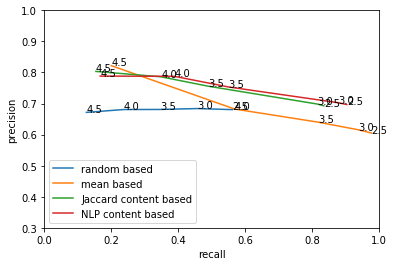

In [22]:
# precisions/recalls

import matplotlib.pyplot as plt

treshold_used = 3.75
tresholds = [2.5, 3.0, 3.5, 4.0, 4.5]

def recommended(predictions, treshold):
    return predictions.loc[(predictions['predicted stars'] >= treshold)]

def hidden(predictions, treshold):
    return predictions.loc[(predictions['predicted stars'] < treshold)]

def used(predictions, treshold):
    return predictions.loc[(predictions['stars']) >= treshold]

def unused(predictions, treshold):
    return predictions.loc[(predictions['stars']) < treshold]

def confusion(recommended, hidden, used, unused):
    true_positives = len(recommended.index.intersection(used.index))
    false_positives = len(recommended.index.intersection(unused.index))
    true_negatives = len(hidden.index.intersection(unused.index))
    false_negatives = len(hidden.index.intersection(used.index))
    return pd.DataFrame(data={'used': [true_positives, false_negatives], 'unused': [false_positives, true_negatives]}, index=['recommended', 'hidden'])

def precision(confusion_matrix):
    return int(confusion_matrix['used']['recommended']) / (int(confusion_matrix['used']['recommended']) + int(confusion_matrix['unused']['recommended']))

def recall(confusion_matrix):
    return int(confusion_matrix['used']['recommended']) / (int(confusion_matrix['used']['recommended']) + int(confusion_matrix['used']['hidden']))

# random based
precisions = []
recalls = []

for treshold in tresholds:
    treshold_recommended = treshold
    precision_random_based = precision(confusion(recommended(df_random_prediction, treshold_recommended), hidden(df_random_prediction, treshold_recommended), used(df_random_prediction, treshold_used), unused(df_random_prediction, treshold_used)))
    recall_random_based = recall(confusion(recommended(df_random_prediction, treshold_recommended), hidden(df_random_prediction, treshold_recommended), used(df_random_prediction, treshold_used), unused(df_random_prediction, treshold_used)))
    precisions.append(precision_random_based)
    recalls.append(recall_random_based)

plt.plot(recalls, precisions)
for r, p, t in zip(recalls, precisions, tresholds):
    plt.text(r, p, t)
    
random_precisions = precisions
random_recalls = recalls


# mean based
precisions = []
recalls = []

for treshold in tresholds:
    treshold_recommended = treshold
    precision_random_based = precision(confusion(recommended(predicted_item_mean, treshold_recommended), hidden(predicted_item_mean, treshold_recommended), used(predicted_item_mean, treshold_used), unused(predicted_item_mean, treshold_used)))
    recall_random_based = recall(confusion(recommended(predicted_item_mean, treshold_recommended), hidden(predicted_item_mean, treshold_recommended), used(predicted_item_mean, treshold_used), unused(predicted_item_mean, treshold_used)))
    precisions.append(precision_random_based)
    recalls.append(recall_random_based)

plt.plot(recalls, precisions)
for r, p, t in zip(recalls, precisions, tresholds):
    plt.text(r, p, t)
    
mean_precisions = precisions
mean_recalls = recalls
    
    
# Jaccard content based
precisions = []
recalls = []

for treshold in tresholds:
    treshold_recommended = treshold
    precision_content_based = precision(confusion(recommended(df_jaccard_prediction, treshold_recommended), hidden(df_jaccard_prediction, treshold_recommended), used(df_jaccard_prediction, treshold_used), unused(df_jaccard_prediction, treshold_used)))
    recall_content_based = recall(confusion(recommended(df_jaccard_prediction, treshold_recommended), hidden(df_jaccard_prediction, treshold_recommended), used(df_jaccard_prediction, treshold_used), unused(df_jaccard_prediction, treshold_used)))
    precisions.append(precision_content_based)
    recalls.append(recall_content_based)

plt.plot(recalls, precisions)
for r, p, t in zip(recalls, precisions, tresholds):
    plt.text(r, p, t)
    
jaccard_precisions = precisions
jaccard_recalls = recalls

    
# NLP content based
precisions = []
recalls = []

for treshold in tresholds:
    treshold_recommended = treshold
    precision_content_based = precision(confusion(recommended(df_nlp_prediction, treshold_recommended), hidden(df_nlp_prediction, treshold_recommended), used(df_nlp_prediction, treshold_used), unused(df_nlp_prediction, treshold_used)))
    recall_content_based = recall(confusion(recommended(df_nlp_prediction, treshold_recommended), hidden(df_nlp_prediction, treshold_recommended), used(df_nlp_prediction, treshold_used), unused(df_nlp_prediction, treshold_used)))
    precisions.append(precision_content_based)
    recalls.append(recall_content_based)

plt.plot(recalls, precisions)
for r, p, t in zip(recalls, precisions, tresholds):
    plt.text(r, p, t)
    
nlp_precisions = precisions
nlp_recalls = recalls
    
    
plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')

plt.legend(['random based', 'mean based', 'Jaccard content based', 'NLP content based'], loc = 'lower left')

# print('Moet soms opnieuw gerund worden voor het plot!')

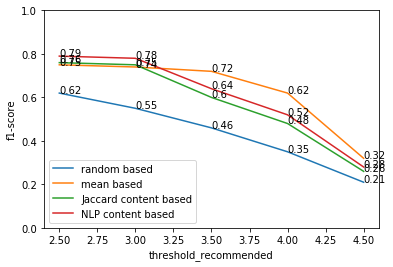

In [21]:
# f1 score berekenen

# random based
f1 = []

for num, tres in enumerate(tresholds):
    f1.append(round((2 * ((random_precisions[num] * random_recalls[num]) / (random_precisions[num] + random_recalls[num]))), 2))

plt.plot(tresholds, f1)
for r, p, t in zip(tresholds, f1, f1):
    plt.text(r, p, t)
    
# mean based
f1 = []

for num, tres in enumerate(tresholds):
    f1.append(round((2 * ((mean_precisions[num] * mean_recalls[num]) / (mean_precisions[num] + mean_recalls[num]))), 2))

plt.plot(tresholds, f1)
for r, p, t in zip(tresholds, f1, f1):
    plt.text(r, p, t)
    
# Jaccard content based
f1 = []

for num, tres in enumerate(tresholds):
    f1.append(round(2 * ((jaccard_precisions[num] * jaccard_recalls[num]) / (jaccard_precisions[num] + jaccard_recalls[num])), 2))

plt.plot(tresholds, f1)
for r, p, t in zip(tresholds, f1, f1):
    plt.text(r, p, t)

# NLP content based
f1 = []

for num, tres in enumerate(tresholds):
    f1.append(round(2 * ((nlp_precisions[num] * nlp_recalls[num]) / (nlp_precisions[num] + nlp_recalls[num])), 2))

plt.plot(tresholds, f1)
for r, p, t in zip(tresholds, f1, f1):
    plt.text(r, p, t)


plt.xlim(2.4, 4.6)
plt.ylim(0.0, 1.0)
plt.xlabel('threshold_recommended')
plt.ylabel('f1-score')

plt.legend(['random based', 'mean based', 'Jaccard content based', 'NLP content based'], loc = 'lower left')